<a href="https://colab.research.google.com/github/Sathvik2954/Infosys_Edu2Job_Predicting_Job_Roles_from_Educational_Background/blob/main/Data_Preprocessing_roo_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pandas scikit-learn numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Saving roo_data.csv to roo_data.csv
Dataset loaded successfully!
Dataset shape: (20000, 39)

First 5 rows:


,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [9]:
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes.value_counts()}")

# Check for missing values
print("\n MISSING VALUES ANALYSIS")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_info = missing_info[missing_info['Missing Count'] > 0]
if len(missing_info) > 0:
    display(missing_info)
else:
    print("No missing values found!")

# Check basic statistics
print("\nNUMERICAL FEATURES STATISTICS")
print("="*50)
numerical_cols = df.select_dtypes(include=[np.number]).columns
display(df[numerical_cols].describe())

DATASET OVERVIEW
Shape: (20000, 39)
Columns: ['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Salary Range Expected', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


In [10]:
df_processed = df.copy()
print("STARTING DATA PREPROCESSING...")

binary_mappings = {
    'yes': 1, 'no': 0,
    'Yes': 1, 'No': 0,
    'YES': 1, 'NO': 0
}

binary_columns = ['can work long time before system?', 'self-learning capability?',
                'Taken inputs from seniors or elders', 'interested in games',
                'In a Realtionship?', 'worked in teams ever?', 'Introvert']

print(" Encoding binary variables...")
for col in binary_columns:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(binary_mappings)
        print(f"   {col}: {df_processed[col].unique()}")

print("\n Encoding ordinal variables...")
ordinal_columns = {
    'reading and writing skills': ['poor', 'medium', 'excellent'],
    'memory capability score': ['poor', 'medium', 'excellent'],
    'Gentle or Tuff behaviour?': ['gentle', 'stubborn'],
    'hard/smart worker': ['hard worker', 'smart worker']
}

for col, categories in ordinal_columns.items():
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        print(f"   {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n Encoding other categorical variables...")
other_categorical = ['Management or Technical', 'Salary/work', 'Job/Higher Studies?',
                   'Salary Range Expected', 'Interested Type of Books']

label_encoders = {}
for col in other_categorical:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"   {col}: {len(le.classes_)} unique categories")

print("\n One-hot encoding high cardinality features...")
high_cardinality_cols = ['Interested subjects', 'interested career area',
                       'Type of company want to settle in?', 'Extra-courses did']

for col in high_cardinality_cols[:2]:
    if col in df_processed.columns:
        dummies = pd.get_dummies(df_processed[col], prefix=col)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed.drop(col, axis=1, inplace=True)
        print(f"   {col}: created {dummies.shape[1]} new features")

target_column = 'Suggested Job Role'
if target_column in df_processed.columns:
    target_encoder = LabelEncoder()
    df_processed[target_column] = target_encoder.fit_transform(df_processed[target_column])
    print(f"\nTarget variable encoded: {len(target_encoder.classes_)} unique job roles")
    print(f"   Job roles: {list(target_encoder.classes_)}")

STARTING DATA PREPROCESSING...
 Encoding binary variables...
   can work long time before system?: [1 0]
   self-learning capability?: [1 0]
   Taken inputs from seniors or elders: [0 1]
   interested in games: [0 1]
   In a Realtionship?: [0 1]
   worked in teams ever?: [1 0]
   Introvert: [0 1]

 Encoding ordinal variables...
   reading and writing skills: {'excellent': np.int64(0), 'medium': np.int64(1), 'poor': np.int64(2)}
   memory capability score: {'excellent': np.int64(0), 'medium': np.int64(1), 'poor': np.int64(2)}
   Gentle or Tuff behaviour?: {'gentle': np.int64(0), 'stubborn': np.int64(1)}
   hard/smart worker: {'hard worker': np.int64(0), 'smart worker': np.int64(1)}

 Encoding other categorical variables...
   Management or Technical: 2 unique categories
   Salary/work: 2 unique categories
   Job/Higher Studies?: 2 unique categories
   Salary Range Expected: 2 unique categories
   Interested Type of Books: 31 unique categories

 One-hot encoding high cardinality features

In [11]:
numerical_columns = ['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
                   'Percentage in Programming Concepts', 'Percentage in Software Engineering',
                   'Percentage in Computer Networks', 'Percentage in Electronics Subjects',
                   'Percentage in Computer Architecture', 'Percentage in Mathematics',
                   'Percentage in Communication skills', 'Hours working per day',
                   'Logical quotient rating', 'hackathons', 'coding skills rating',
                   'public speaking points']

print("Scaling numerical features...")
scaler = StandardScaler()

existing_numerical = [col for col in numerical_columns if col in df_processed.columns]
df_processed[existing_numerical] = scaler.fit_transform(df_processed[existing_numerical])
print(f"   Scaled {len(existing_numerical)} numerical features")

print("\n Creating new features...")
academic_cols = [col for col in df_processed.columns if 'percentage' in col.lower() or 'Percentage' in col]
if academic_cols:
    df_processed['academic_performance_score'] = df_processed[academic_cols].mean(axis=1)
    print(f"   Created academic_performance_score from {len(academic_cols)} subjects")
technical_cols = ['coding skills rating', 'Logical quotient rating', 'hackathons']
technical_cols = [col for col in technical_cols if col in df_processed.columns]
if technical_cols:
    df_processed['technical_skills_score'] = df_processed[technical_cols].mean(axis=1)
    print(f"   Created technical_skills_score from {len(technical_cols)} metrics")
soft_skills_cols = ['public speaking points', 'Communication skills', 'reading and writing skills']
soft_skills_cols = [col for col in soft_skills_cols if col in df_processed.columns]
if soft_skills_cols:
    df_processed['soft_skills_score'] = df_processed[soft_skills_cols].mean(axis=1)
    print(f"   Created soft_skills_score from {len(soft_skills_cols)} metrics")

Scaling numerical features...
   Scaled 14 numerical features

 Creating new features...
   Created academic_performance_score from 9 subjects
   Created technical_skills_score from 3 metrics
   Created soft_skills_score from 2 metrics


In [12]:
columns_to_drop = ['Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads']
columns_to_drop = [col for col in columns_to_drop if col in df_processed.columns]

if columns_to_drop:
    df_processed = df_processed.drop(columns=columns_to_drop)
    print(f" Dropped {len(columns_to_drop)} redundant columns")

print(" PREPROCESSING COMPLETED!")
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {df_processed.shape}")
print(f"Total features after preprocessing: {df_processed.shape[1]}")
print(f"Target variable: {target_column}")

print("\n Processed Dataset Info:")
print(f"Numerical columns: {len(df_processed.select_dtypes(include=[np.number]).columns)}")
print(f"Missing values: {df_processed.isnull().sum().sum()}")

print("\nFirst 3 rows of processed data:")
display(df_processed.head(3))

print("\nProcessed dataset columns:")
print(df_processed.columns.tolist())

 Dropped 5 redundant columns
 PREPROCESSING COMPLETED!
Original dataset shape: (20000, 39)
Processed dataset shape: (20000, 46)
Total features after preprocessing: 46
Target variable: Suggested Job Role

 Processed Dataset Info:
Numerical columns: 34
Missing values: 0

First 3 rows of processed data:


,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested subjects_Software Engineering,Interested subjects_cloud computing,Interested subjects_data engineering,Interested subjects_hacking,Interested subjects_networks,Interested subjects_parallel computing,Interested subjects_programming,academic_performance_score,technical_skills_score,soft_skills_score
0,-0.793450,-1.380807,0.096941,0.981950,1.700806,1.670279,0.986229,0.699022,-1.575875,0.390962,...,False,True,False,False,False,False,False,0.265010,-0.755966,0.576945
1,0.098925,-1.479803,-0.396421,-1.694608,-0.594640,-0.689921,-0.404204,0.699022,1.393469,1.547595,...,False,False,False,False,True,False,False,-0.340909,-0.460649,0.611250
2,-0.595145,0.896086,1.379680,0.981950,-1.592660,0.391837,-0.503520,-0.484608,1.690403,1.162051,...,False,False,False,True,False,False,False,0.240447,-0.867141,0.611250



Processed dataset columns:
['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'reading and writing skills', 'memory capability score', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Salary Range Expected', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'Salary/work', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role', 'Interested subjects_Compute

In [13]:
def prepare_for_ml(data, target_col='Suggested Job Role', test_size=0.2, random_state=42):
    if target_col not in data.columns:
        print(f"Target column '{target_col}' not found!")
        return None, None, None, None
    X = data.drop(columns=[target_col])
    y = data[target_col]

    unique_classes = np.unique(y)
    print(f"TARGET VARIABLE ANALYSIS")
    print("=" * 50)
    print(f"Total unique job roles: {len(unique_classes)}")
    print(f"Total samples: {len(y)}")

    print(f"\n JOB ROLE DISTRIBUTION (Before Split):")
    print("-" * 40)
    for class_idx in unique_classes:
        class_name = target_encoder.inverse_transform([class_idx])[0]
        count = (y == class_idx).sum()
        percentage = (count / len(y)) * 100
        print(f"  {class_idx:2d} - {class_name:<35}: {count:3d} samples ({percentage:5.1f}%)")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y,
        shuffle=True
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepare_for_ml(df_processed)

if X_train is not None:
    print("\n" + " DATA SPLITTING COMPLETED")
    print("=" * 50)
    print(f"Training set: {X_train.shape}")
    print(f"Testing set: {X_test.shape}")
    print(f"Total features: {X_train.shape[1]}")

    print(f"\n CLASS DISTRIBUTION AFTER SPLITTING:")

    print("TRAINING SET:")
    train_class_dist = pd.Series(y_train).value_counts().sort_index()
    for class_idx, count in train_class_dist.items():
        class_name = target_encoder.inverse_transform([class_idx])[0]
        percentage = (count / len(y_train)) * 100
        print(f"  {class_idx:2d} - {class_name:<35}: {count:3d} samples ({percentage:5.1f}%)")

    print(f"\nTESTING SET:")
    test_class_dist = pd.Series(y_test).value_counts().sort_index()
    for class_idx, count in test_class_dist.items():
        class_name = target_encoder.inverse_transform([class_idx])[0]
        percentage = (count / len(y_test)) * 100
        print(f"  {class_idx:2d} - {class_name:<35}: {count:3d} samples ({percentage:5.1f}%)")

    print(f"\n SPLIT SUMMARY:")
    print("-" * 40)
    print(f"Total unique job roles: {len(np.unique(y_train))}")
    print(f"Training samples: {len(X_train):,} ({len(X_train)/len(df_processed)*100:.1f}%)")
    print(f"Testing samples: {len(X_test):,} ({len(X_test)/len(df_processed)*100:.1f}%)")
    print(f"Features per sample: {X_train.shape[1]}")

    # Save the processed data
    df_processed.to_csv('processed_student_job_data.csv', index=False)
    print(f"\nProcessed data saved as 'processed_student_job_data.csv'")

    # Download the processed file
    files.download('processed_student_job_data.csv')

TARGET VARIABLE ANALYSIS
Total unique job roles: 34
Total samples: 20000

 JOB ROLE DISTRIBUTION (Before Split):
----------------------------------------
   0 - Applications Developer             : 551 samples (  2.8%)
   1 - Business Intelligence Analyst      : 540 samples (  2.7%)
   2 - Business Systems Analyst           : 582 samples (  2.9%)
   3 - CRM Business Analyst               : 584 samples (  2.9%)
   4 - CRM Technical Developer            : 567 samples (  2.8%)
   5 - Data Architect                     : 564 samples (  2.8%)
   6 - Database Administrator             : 593 samples (  3.0%)
   7 - Database Developer                 : 581 samples (  2.9%)
   8 - Database Manager                   : 570 samples (  2.9%)
   9 - Design & UX                        : 588 samples (  2.9%)
  10 - E-Commerce Analyst                 : 546 samples (  2.7%)
  11 - Information Security Analyst       : 543 samples (  2.7%)
  12 - Information Technology Auditor     : 558 samples (  2.8%)
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

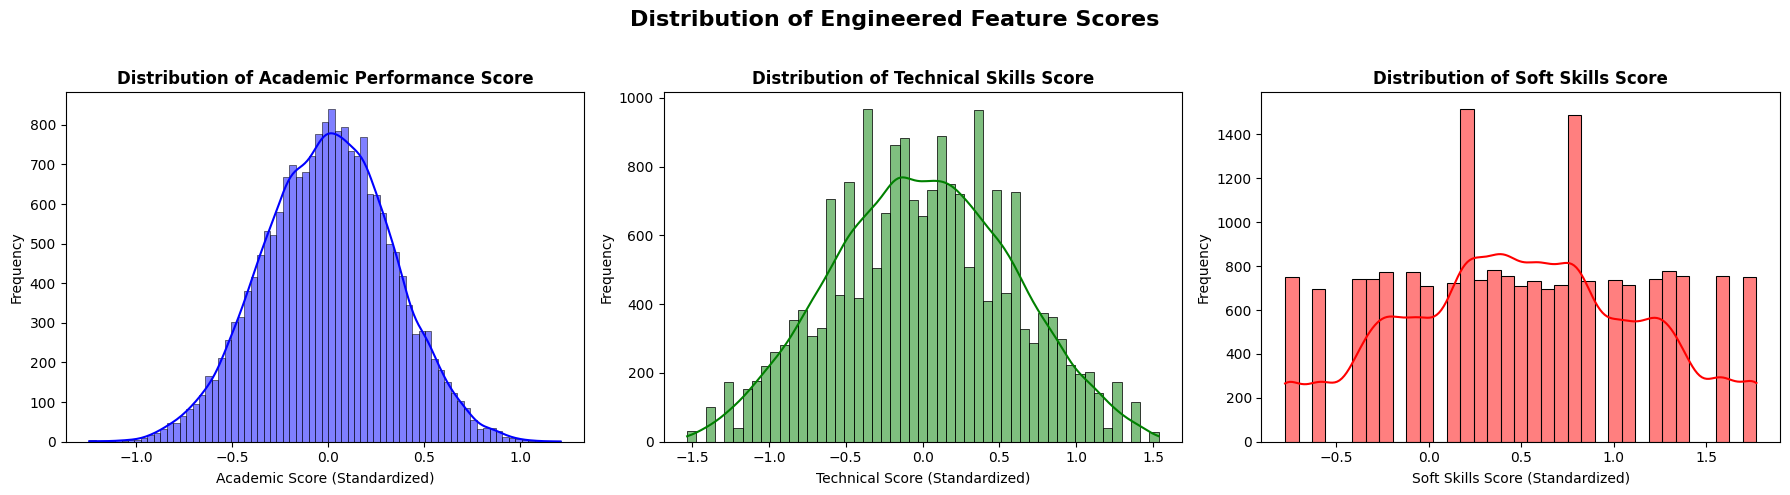

In [16]:
plt.figure(figsize=(18, 5))

# Academic Performance Score
plt.subplot(1, 3, 1)
sns.histplot(df_processed['academic_performance_score'], kde=True, color='blue')
plt.title('Distribution of Academic Performance Score', fontweight='bold')
plt.xlabel('Academic Score (Standardized)')
plt.ylabel('Frequency')

# Technical Skills Score
plt.subplot(1, 3, 2)
sns.histplot(df_processed['technical_skills_score'], kde=True, color='green')
plt.title('Distribution of Technical Skills Score', fontweight='bold')
plt.xlabel('Technical Score (Standardized)')
plt.ylabel('Frequency')

# Soft Skills Score
plt.subplot(1, 3, 3)
sns.histplot(df_processed['soft_skills_score'], kde=True, color='red')
plt.title('Distribution of Soft Skills Score', fontweight='bold')
plt.xlabel('Soft Skills Score (Standardized)')
plt.ylabel('Frequency')

plt.suptitle('Distribution of Engineered Feature Scores', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

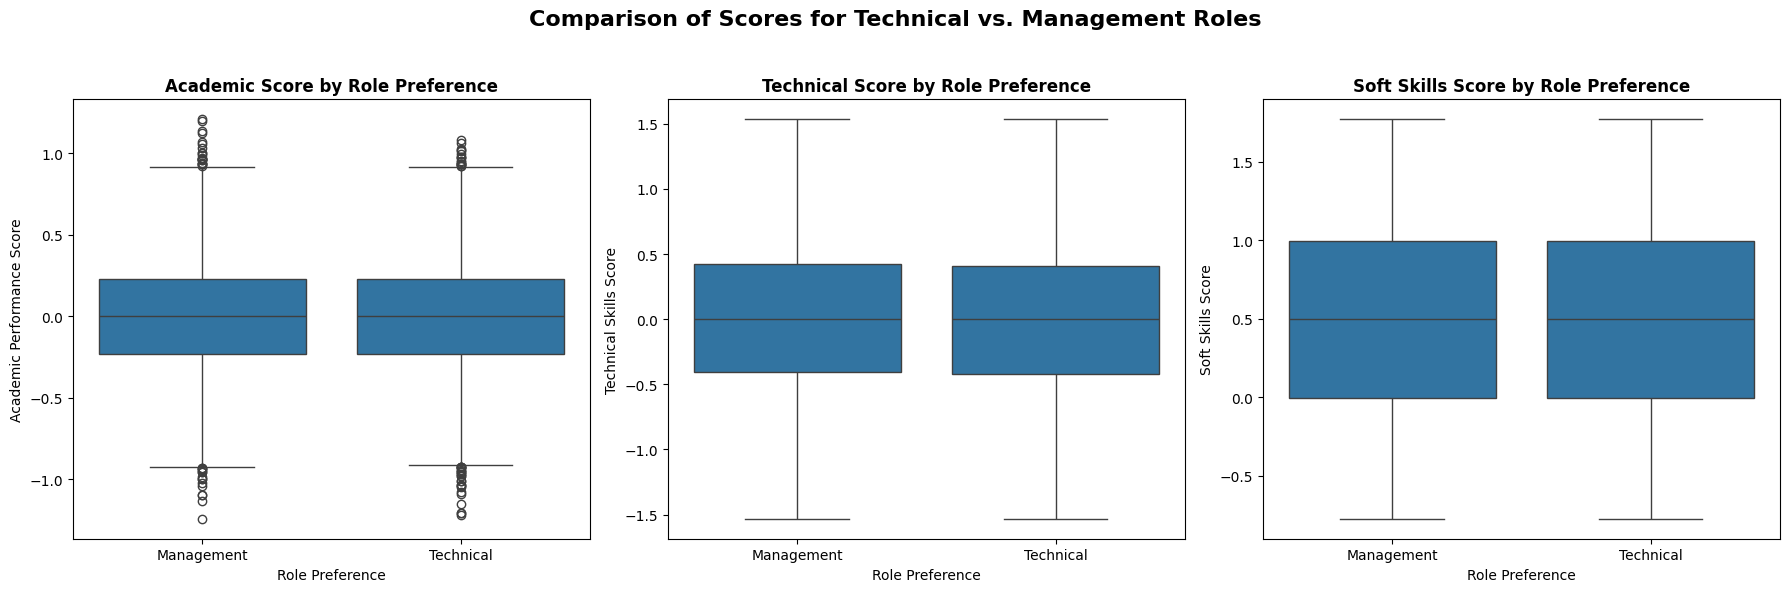

In [17]:
plot_df = pd.concat([
    df[['Management or Technical']],
    df_processed[['academic_performance_score', 'technical_skills_score', 'soft_skills_score']]
], axis=1)

plt.figure(figsize=(18, 6))

# Academic Score vs. Role Type
plt.subplot(1, 3, 1)
sns.boxplot(x='Management or Technical', y='academic_performance_score', data=plot_df)
plt.title('Academic Score by Role Preference', fontweight='bold')
plt.xlabel('Role Preference')
plt.ylabel('Academic Performance Score')

# Technical Score vs. Role Type
plt.subplot(1, 3, 2)
sns.boxplot(x='Management or Technical', y='technical_skills_score', data=plot_df)
plt.title('Technical Score by Role Preference', fontweight='bold')
plt.xlabel('Role Preference')
plt.ylabel('Technical Skills Score')

# Soft Skills Score vs. Role Type
plt.subplot(1, 3, 3)
sns.boxplot(x='Management or Technical', y='soft_skills_score', data=plot_df)
plt.title('Soft Skills Score by Role Preference', fontweight='bold')
plt.xlabel('Role Preference')
plt.ylabel('Soft Skills Score')

plt.suptitle('Comparison of Scores for Technical vs. Management Roles', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

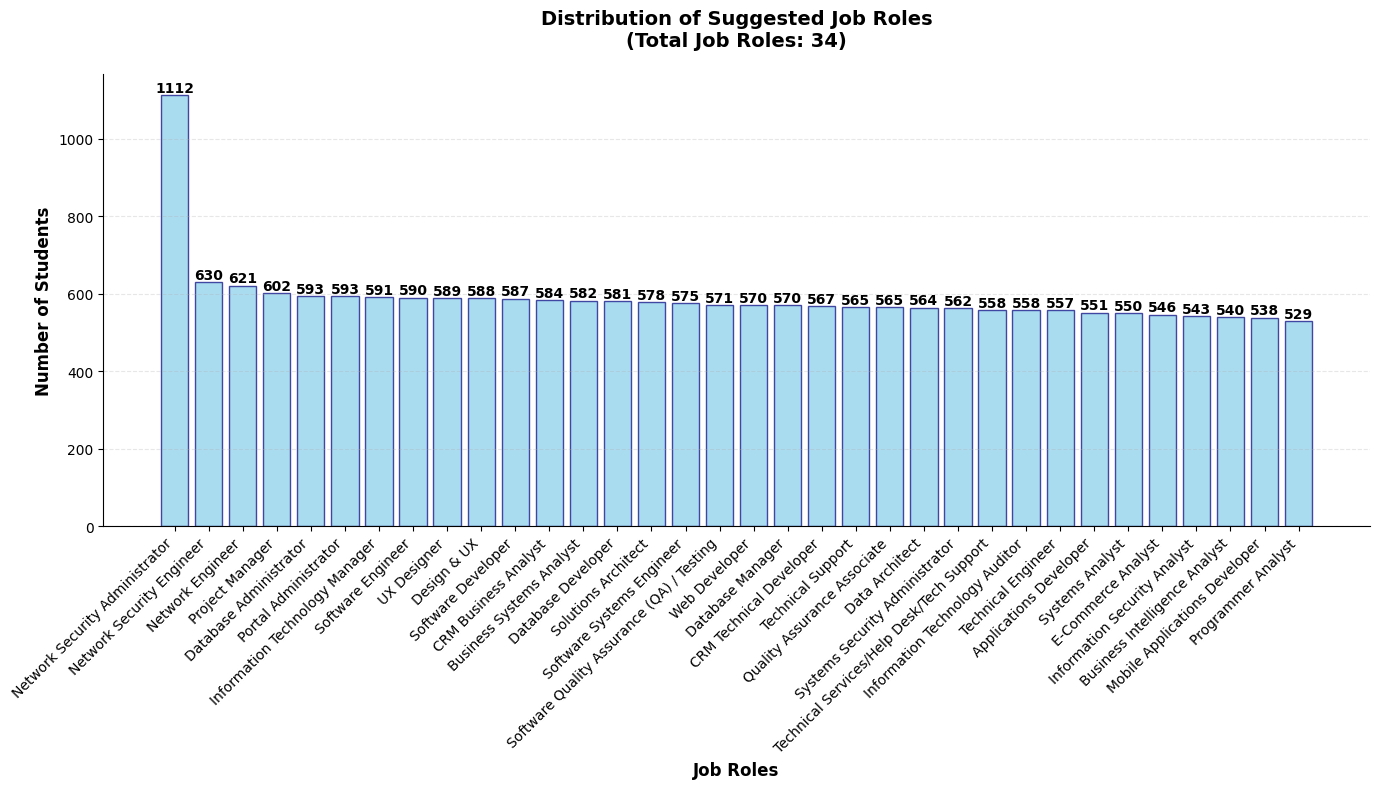

Job Role Distribution Summary
Total unique job roles: 34
Total students: 20000
Most common job role: Network Security Administrator (1112 students)
Least common job role: Programmer Analyst (529 students)
Average students per role: 588


In [14]:
plt.figure(figsize=(14, 8))
if 'Suggested Job Role' in df_processed.columns:
    target_counts = df_processed['Suggested Job Role'].value_counts()

    job_names = [target_encoder.inverse_transform([idx])[0] for idx in target_counts.index]
    bars = plt.bar(job_names, target_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)

    for bar, count in zip(bars, target_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')

    plt.xlabel('Job Roles', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
    plt.title('Distribution of Suggested Job Roles\n(Total Job Roles: {})'.format(len(target_counts)),
             fontsize=14, fontweight='bold', pad=20)

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(axis='y', alpha=0.3, linestyle='--')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(f"Job Role Distribution Summary")
    print(f"Total unique job roles: {len(target_counts)}")
    print(f"Total students: {len(df_processed)}")
    print(f"Most common job role: {job_names[0]} ({target_counts.iloc[0]} students)")
    print(f"Least common job role: {job_names[-1]} ({target_counts.iloc[-1]} students)")
    print(f"Average students per role: {len(df_processed) // len(target_counts)}")